# Lab 1. PyTorch and ANNs

This lab is a warm up to get you used to the PyTorch programming environment used
in the course, and also to help you review and renew your knowledge
of Python and relevant Python libraries.
The lab must be done individually. Please recall that the
University of Toronto plagarism rules apply.

By the end of this lab, you should be able to:

1. Be able to perform basic PyTorch tensor operations.
2. Be able to load data into PyTorch
3. Be able to configure an Artificial Neural Network (ANN) using PyTorch
4. Be able to train ANNs using PyTorch
5. Be able to evaluate different ANN configuations

You will need to use numpy and PyTorch documentations for this assignment:

* https://docs.scipy.org/doc/numpy/reference/
* https://pytorch.org/docs/stable/torch.html

You can also reference Python API documentations freely.


### What to submit

Submit a PDF file containing all your code, outputs, and write-up
from parts 1-5. You can produce a PDF of your Google Colab file by
going to `File -> Print` and then save as PDF. The Colab instructions
has more information.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission.

**Adjust the scaling to ensure that the text is not cutoff at the margins.**

## Colab Link

Submit make sure to include a link to your colab file here

Colab Link: https://drive.google.com/file/d/1rvcMaQrxAsrU2n6xL_DHPBD_i6AuJb2K/view?usp=sharing

## Part 1. Python Basics [3 pt]

The purpose of this section is to get you used to the
basics of Python, including working with functions, numbers,
lists, and strings.

Note that we **will** be checking your code for clarity and efficiency.

If you have trouble with this part of the assignment, please review http://cs231n.github.io/python-numpy-tutorial/

### Part (a) -- 1pt

Write a function `sum_of_cubes` that computes the sum of cubes up to `n`. If the input to `sum_of_cubes` invalid (e.g. negative or non-integer `n`), the function should print out `"Invalid input"` and return `-1`.

In [1]:
def sum_of_cubes(n):
    """Return the sum (1^3 + 2^3 + 3^3 + ... + n^3)

    Precondition: n > 0, type(n) == int

    >>> sum_of_cubes(3)
    36
    >>> sum_of_cubes(1)
    1
    """
    result = 0

    if( type(n)!=int or n<0 ):
      print("Invalid input")
      result = -1
    else:
      for term in range(1,n+1):
        result = result + (term**3)

    return result

### Part (b) -- 1pt

Write a function `word_lengths` that takes a sentence (string), computes the length of each word in that sentence, and returns the length of each word in a list. You can
assume that words are always separated by a space character `" "`.

Hint: recall the `str.split` function in Python.
If you arenot sure how this function works, try
typing `help(str.split)` into a Python shell, or check out https://docs.python.org/3.6/library/stdtypes.html#str.split

In [2]:
help(str.split)

Help on method_descriptor:

split(self, /, sep=None, maxsplit=-1)
    Return a list of the substrings in the string, using sep as the separator string.
    
      sep
        The separator used to split the string.
    
        When set to None (the default value), will split on any whitespace
        character (including \\n \\r \\t \\f and spaces) and will discard
        empty strings from the result.
      maxsplit
        Maximum number of splits (starting from the left).
        -1 (the default value) means no limit.
    
    Note, str.split() is mainly useful for data that has been intentionally
    delimited.  With natural text that includes punctuation, consider using
    the regular expression module.



In [3]:
def word_lengths(sentence):
  """Return a list containing the length of each word in
  sentence.

  >>> word_lengths("welcome to APS360!")
  [7, 2, 7]
  >>> word_lengths("machine learning is so cool")
  [7, 8, 2, 2, 4]
  """
  result = []

  words = sentence.split() # split sentence of string into array of each words
  result = [len(word) for word in words] # to get length of each word

  return result

### Part (c) -- 1pt

Write a function `all_same_length` that takes a sentence (string),
and checks whether every word in the string is the same length.
You should call the function `word_lengths` in the body
of this new function.


In [4]:
def all_same_length(sentence):
  """Return True if every word in sentence has the same
  length, and False otherwise.

  >>> all_same_length("all same length")
  False
  >>> all_same_length("hello world")
  True
  """
  lengths = word_lengths(sentence)

  # Using the python set method, duplicated length of words will be removed
  return len(set(lengths)) == 1 or not lengths # Assuming a empty list returns True

## Part 2. NumPy Exercises [5 pt]

In this part of the assignment, you'll be manipulating arrays
usign NumPy. Normally, we use the shorter name `np` to represent
the package `numpy`.

In [5]:
import numpy as np

### Part (a) -- 1pt

The below variables `matrix` and `vector` are numpy arrays. Explain what you think `<NumpyArray>.size` and `<NumpyArray>.shape` represent.

In [6]:
matrix = np.array([[1., 2., 3., 0.5],
                   [4., 5., 0., 0.],
                   [-1., -2., 1., 1.]])

vector = np.array([2., 0., 1., -2.])

In [7]:
matrix.size

12

In [8]:
matrix.shape

(3, 4)

In [9]:
vector.size

4

In [10]:
vector.shape

(4,)

`<NumpyArray>.size`:
- represents the total number of elements in the numpy array
> in other words, 'size' is how many items we have in total

`<NumpyArray>.shape`:
- represents the dimensions or structure of the array
> whereas, 'shape' is how those items are arranged or organized

### Part (b) -- 1pt

Perform matrix multiplication `output = matrix x vector` by using
for loops to iterate through the columns and rows.
Do not use any builtin NumPy functions.
Cast your output into a NumPy array, if it isn't one already.

Hint: be mindful of the dimension of output

In [11]:
matrix = np.array([[1., 2., 3., 0.5],
                   [4., 5., 0., 0.],
                   [-1., -2., 1., 1.]])

vector = np.array([2., 0., 1., -2.])

In [12]:
output = np.array([])

for row in range(0,3):
  sum = 0
  for column in range(0,4):
    sum += matrix[row][column]*vector[column]
  output = np.append(output, sum) # to capture for new array returned

In [13]:
output

array([ 4.,  8., -3.])

### Part (c) -- 1pt

Perform matrix multiplication `output2 = matrix x vector` by using
the function `numpy.dot`.

We will never actually write code as in
part(c), not only because `numpy.dot` is more concise and easier to read/write, but also performance-wise `numpy.dot` is much faster (it is written in C and highly optimized).
In general, we will avoid for loops in our code.

In [14]:
output2 = np.dot(matrix, vector)

In [15]:
output2

array([ 4.,  8., -3.])

### Part (d) -- 1pt

As a way to test for consistency, show that the two outputs match.

In [16]:
print(np.array_equal(output, output2))

True


### Part (e) -- 1pt

Show that using `np.dot` is faster than using your code from part (c).

You may find the below code snippit helpful:

In [17]:
import time

# record the time before running code
start_time = time.time()

# place code to run here
for i in range(10000):
    99*99

# record the time after the code is run
end_time = time.time()

# compute the difference
diff = end_time - start_time
diff

0.0008487701416015625

In [18]:
# for loop multiplication

# record the time before running code
start_time = time.time()

for row in range(0,3):
  sum = 0
  for column in range(0,4):
    sum += matrix[row][column]*vector[column]
  output = np.append(output, sum) # to capture for new array returned

# record the time after the code is run
end_time = time.time()

# compute the difference
diff1 = end_time - start_time
diff1

0.0011563301086425781

In [19]:
# np.dot multiplication

# record the time before running code
start_time = time.time()

output2 = np.dot(matrix, vector)

# record the time after the code is run
end_time = time.time()

# compute the difference
diff2 = end_time - start_time
diff2

0.0002071857452392578

In [20]:
# Comparison of results
print("Time using for loop:", np.around(diff1, decimals=9))
print("Time using dot:", np.around(diff2, decimals=9),'\n')

print("dot method is fater than for loop multiplication by:",
      str(np.around((diff1-diff2), decimals=9))+"s")

Time using for loop: 0.00115633
Time using dot: 0.000207186 

dot method is fater than for loop multiplication by: 0.000949144s


## Part 3. Images [6 pt]

A picture or image can be represented as a NumPy array of “pixels”,
with dimensions H × W × C, where H is the height of the image, W is the width of the image,
and C is the number of colour channels. Typically we will use an image with channels that give the the Red, Green, and Blue “level” of each pixel, which is referred to with the short form RGB.

You will write Python code to load an image, and perform several array manipulations to the image and visualize their effects.

In [21]:
import matplotlib.pyplot as plt

### Part (a) -- 1 pt

This is a photograph of a dog whose name is Mochi.

![alt text](https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews)

Load the image from its url (https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews) into the variable `img` using the `plt.imread` function.

Hint: You can enter the URL directly into the `plt.imread` function as a Python string.

In [22]:
#pip install requests matplotlib

In [23]:
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Define the Google Drive image URL
url = "https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews"

# Fetch the content of the image using requests
response = requests.get(url)
img_content = BytesIO(response.content)

# Read the image content using plt.imread
img = plt.imread(img_content)

### Part (b) -- 1pt

Use the function `plt.imshow` to visualize `img`.

This function will also show the coordinate system used to identify pixels.
The origin is at the top left corner, and the first dimension indicates the Y (row) direction,
and the second dimension indicates the X (column) dimension.

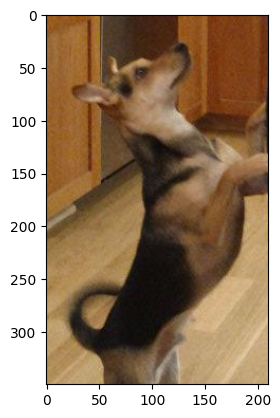

In [24]:
# Display the image to ensure it loaded correctly
plt.imshow(img)
plt.show()

### Part (c) -- 2pt

Modify the image by adding a constant value of 0.25 to each pixel in the `img` and
store the result in the variable `img_add`. Note that, since the range for the pixels
needs to be between [0, 1], you will also need to clip img_add to be in the range [0, 1]
using `numpy.clip`. Clipping sets any value that is outside of the desired range to the
closest endpoint. Display the image using `plt.imshow`.

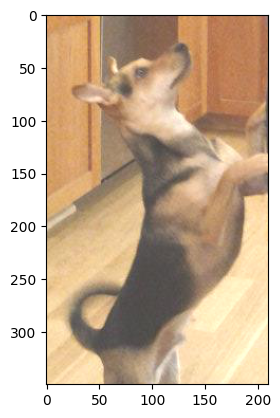

In [25]:
# Add a constant value to each pixel
img_add = img + 0.25

# Clipping the pixel values to be in range [0,1]
img_add = np.clip(img_add, 0, 1)

# Showing the modified image
plt.imshow(img_add)
plt.show()

### Part (d) -- 2pt

Crop the **original** image (`img` variable) to a 130 x 150 image including Mochi's face. Discard the alpha colour channel (i.e. resulting `img_cropped` should **only have RGB channels**)

Display the image.

In [26]:
print(img.shape)

(350, 210, 4)


In [27]:
print(img_add.shape)

(350, 210, 4)


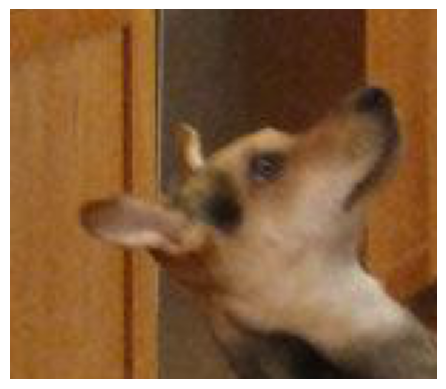

In [28]:
# Crop dimensions
start_row = 0  # Adjust based on where Mochi's face starts
start_col = 0  # Adjust based on where Mochi's face starts
height = 130
width = 150

img_cropped = img[start_row:start_row+height, start_col:start_col+width]

# If the image has an alpha channel (its 4 channels),
# discard the alpha channel (so there is no opacity attribute)
if img_cropped.shape[2] == 4: # check in the 3rd dimension
    img_cropped = img_cropped[:, :, :3] # drop the 4th channel

# Display the cropped image
plt.imshow(img_cropped)
plt.axis('off')  # Hide axes
plt.show()

In [29]:
print(img_cropped.shape)

(130, 150, 3)


## Part 4. Basics of PyTorch [6 pt]

PyTorch is a Python-based neural networks package. Along with tensorflow, PyTorch is currently one of the most popular machine learning libraries.

PyTorch, at its core, is similar to Numpy in a sense that they both
try to make it easier to write codes for scientific computing
achieve improved performance over vanilla Python by leveraging highly optimized C back-end.
However, compare to Numpy, PyTorch offers much better GPU support and provides many high-level features for machine learning. Technically, Numpy can be used to perform almost every thing PyTorch does. However, Numpy would be a lot slower than PyTorch, especially with CUDA GPU, and it would take more effort to write machine learning related code compared to using PyTorch.

In [30]:
import torch

### Part (a) -- 1 pt

Use the function `torch.from_numpy` to convert the numpy array `img_cropped` into
a PyTorch tensor. Save the result in a variable called `img_torch`.

In [31]:
img_torch = torch.from_numpy(img_cropped)

### Part (b) -- 1pt

Use the method `<Tensor>.shape` to find the shape (dimension and size) of `img_torch`.

In [32]:
img_torch.shape

torch.Size([130, 150, 3])

### Part (c) -- 1pt

How many floating-point numbers are stored in the tensor `img_torch`?

In [33]:
num_elements = img_torch.numel()

print(num_elements)

58500


Or, we can also calculate it ourselves by:
> 130 * 150 * 3 = 58500

### Part (d) -- 1 pt

What does the code `img_torch.transpose(0,2)` do? What does the expression return?
Is the original variable `img_torch` updated? Explain.

**What it does:**
> - it swaps the dimension '0' with the dimension '2' of the tensor

**What it returns:**
> - it returns a new tensor where the specified dimensions are transposed
> - in this example, the tensor's shape will be transposed from **'(height, width, channels)'** to become **'(channels, width, height)'**

**Is the orighinal variable `img_torch` update?**
> no, the original 'img_torch' is not updated, because the **'transpose()'** method returns a new tensors and does not modify the original tensor in-place

In [34]:
# Quick demo of showing the swap of dimensions 0 and 2
print("Original img_torch shape:", img_torch.shape)

transposed = img_torch.transpose(0,2)
print("\nTransposed tensor shape:", transposed.shape)

Original img_torch shape: torch.Size([130, 150, 3])

Transposed tensor shape: torch.Size([3, 150, 130])


### Part (e) -- 1 pt

What does the code `img_torch.unsqueeze(0)` do? What does the expression return?
Is the original variable `img_torch` updated? Explain.

**What it does:**
> - it adds a new dimension of size 1 at position '0' of the tensor's shape

**What it returns:**
> - it returns a new tensor with the added dimension
> - in this example, the tensor's shape will be transposed from **'(height, width, channels)'** to become **'(1, height, width, channels)'**

**Is the orighinal variable `img_torch` update?**
> no, the original 'img_torch' is not updated, because the **'unsqueeze()'** method returns a new tensors and does not modify the original tensor in-place

In [35]:
# Quick demo of showing the adding a new dimension at position '0'
print("Original img_torch shape:", img_torch.shape)

transposed = img_torch.unsqueeze(0)
print("\nTransposed tensor shape:", transposed.shape)

Original img_torch shape: torch.Size([130, 150, 3])

Transposed tensor shape: torch.Size([1, 130, 150, 3])


### Part (f) -- 1 pt

Find the maximum value of `img_torch` along each colour channel? Your output should be a one-dimensional
PyTorch tensor with exactly three values.

Hint: lookup the function `torch.max`.

In [36]:
# Using the torch.max method
# Find the maximum acrros the height
max_across_height = torch.max(img_torch, dim=0)[0]
# Returns a (width, color) that represents the max height element

# Find the maximum across the width
max_across_both = torch.max(max_across_height, dim=0)[0]
# Returns a (color) that repersents the max height and width element

print(max_across_both)

tensor([0.8941, 0.7882, 0.6745])


## Part 5. Training an ANN [10 pt]

The sample code provided below is a 2-layer ANN trained on the MNIST dataset to identify digits less than 3 or greater than and equal to 3. Modify the code by changing any of the following and observe how the accuracy and error are affected:

- number of training iterations
- number of hidden units
- numbers of layers
- types of activation functions
- learning rate

Please select at least three different options from the list above. For each option, please select two to three different parameters and provide a table.


In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim

torch.manual_seed(99) # set the random seed

# define a 2-layer artificial neural network
class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 30)
        self.layer2 = nn.Linear(30, 1)

    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        return activation2

pigeon = Pigeon()


# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val   = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()


# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

for (image, label) in mnist_train:
    # actual ground truth: is the digit less than 3?
    actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
    # pigeon prediction
    out = pigeon(img_to_tensor(image)) # step 1-2
    # update the parameters based on the loss
    loss = criterion(out, actual)      # step 3
    loss.backward()                    # step 4 (compute the updates for each parameter)
    optimizer.step()                   # step 4 (make the updates for each parameter)
    optimizer.zero_grad()              # a clean up step for PyTorch


# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/len(mnist_train))
print("Training Accuracy:", 1 - error/len(mnist_train))


# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_val:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/len(mnist_val))
print("Test Accuracy:", 1 - error/len(mnist_val))

100%|██████████| 9912422/9912422 [00:00<00:00, 88974824.77it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 24178781.20it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 21450278.05it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14710833.03it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Training Error Rate: 0.043
Training Accuracy: 0.957
Test Error Rate: 0.086
Test Accuracy: 0.914


#### Let's get started!

In [ ]:
import pandas as pd

torch.manual_seed(99) # set the random seed

# Hyperparameters
hidden_units = [10, 30, 50]
num_layers = [1, 2, 3]
activations = ['relu', 'tanh', 'sigmoid']

# Modified Pigeon Model
class Pigeon(nn.Module):
  def __init__(self, num_layers, hidden_units, activation_type):
      super(Pigeon, self).__init__()
      self.activation_type = activation_type
      self.layers = nn.ModuleList()

      # Input layer
      self.layers.append(nn.Linear(28 * 28, hidden_units))

      # Hidden layers
      for _ in range(num_layers - 1):
          self.layers.append(nn.Linear(hidden_units, hidden_units))

      # Output layer
      self.layers.append(nn.Linear(hidden_units, 1))

  def forward(self, img):
      flattened = img.view(-1, 28 * 28)
      x = flattened
      for i, layer in enumerate(self.layers):
          x = layer(x)
          if i < len(self.layers) - 1:  # Not the last layer
              if self.activation_type == 'relu':
                  x = F.relu(x)
              elif self.activation_type == 'tanh':
                  x = torch.tanh(x)
              elif self.activation_type == 'sigmoid':
                  x = torch.sigmoid(x)
      return x

In [ ]:
# Training and Evaluation Function
def train_and_evaluate(num_layers, hidden_units, activation_type):
  pigeon = Pigeon(num_layers, hidden_units, activation_type)
  optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

  # Training
  for (image, label) in mnist_train:
    # actual ground truth: is the digit less than 3?
    actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
    # pigeon prediction
    out = pigeon(img_to_tensor(image)) # step 1-2
    # update the parameters based on the loss
    loss = criterion(out, actual)      # step 3
    loss.backward()                    # step 4 (compute the updates for each parameter)
    optimizer.step()                   # step 4 (make the updates for each parameter)
    optimizer.zero_grad()              # a clean up step for PyTorch

  # computing the error and accuracy on the training set
  error = 0
  for (image, label) in mnist_train:
      prob = torch.sigmoid(pigeon(img_to_tensor(image)))
      if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
          error += 1

  training_error = error/len(mnist_train)
  training_accuracy = 1 - error/len(mnist_train)

  print("Training Error Rate:", error/len(mnist_train))
  print("Training Accuracy:", 1 - error/len(mnist_train))


  # computing the error and accuracy on a test set
  error = 0
  for (image, label) in mnist_val:
      prob = torch.sigmoid(pigeon(img_to_tensor(image)))
      if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
          error += 1

  test_error = error/len(mnist_val)
  test_accuracy = 1 - error/len(mnist_val)

  print("Test Error Rate:", error/len(mnist_val))
  print("Test Accuracy:", 1 - error/len(mnist_val))


  return training_error, test_error, training_accuracy, test_accuracy

In [ ]:
# Grid Search
results = []

for h_units in hidden_units:
    for layers in num_layers:
        for act in activations:
            train_err, test_err, train_acc, test_acc = train_and_evaluate(layers, h_units, act)

            results.append({
                'Hidden Units': h_units,
                'Num Layers': layers,
                'Activation': act,
                'Training Error': train_err,
                'Test Error': test_err,
                'Training Accuracy': train_acc,
                'Test Accuracy': test_acc
            })

Training Error Rate: 0.047
Training Accuracy: 0.953
Test Error Rate: 0.103
Test Accuracy: 0.897
Training Error Rate: 0.053
Training Accuracy: 0.947
Test Error Rate: 0.103
Test Accuracy: 0.897
Training Error Rate: 0.073
Training Accuracy: 0.927
Test Error Rate: 0.112
Test Accuracy: 0.888
Training Error Rate: 0.069
Training Accuracy: 0.931
Test Error Rate: 0.122
Test Accuracy: 0.878
Training Error Rate: 0.054
Training Accuracy: 0.946
Test Error Rate: 0.112
Test Accuracy: 0.888
Training Error Rate: 0.312
Training Accuracy: 0.688
Test Error Rate: 0.297
Test Accuracy: 0.7030000000000001
Training Error Rate: 0.073
Training Accuracy: 0.927
Test Error Rate: 0.117
Test Accuracy: 0.883
Training Error Rate: 0.059
Training Accuracy: 0.9410000000000001
Test Error Rate: 0.089
Test Accuracy: 0.911
Training Error Rate: 0.312
Training Accuracy: 0.688
Test Error Rate: 0.297
Test Accuracy: 0.7030000000000001
Training Error Rate: 0.031
Training Accuracy: 0.969
Test Error Rate: 0.071
Test Accuracy: 0.929
T

### Part (a) -- 3 pt
Comment on which of the above changes resulted in the best accuracy on training data? What accuracy were you able to achieve?

In [ ]:
# Store in DataFrame
df = pd.DataFrame(results)
display(df)

,Hidden Units,Num Layers,Activation,Training Error,Test Error,Training Accuracy,Test Accuracy
0,10,1,relu,0.047,0.103,0.953,0.897
1,10,1,tanh,0.053,0.103,0.947,0.897
2,10,1,sigmoid,0.073,0.112,0.927,0.888
3,10,2,relu,0.069,0.122,0.931,0.878
4,10,2,tanh,0.054,0.112,0.946,0.888
5,10,2,sigmoid,0.312,0.297,0.688,0.703
6,10,3,relu,0.073,0.117,0.927,0.883
7,10,3,tanh,0.059,0.089,0.941,0.911
8,10,3,sigmoid,0.312,0.297,0.688,0.703
9,30,1,relu,0.031,0.071,0.969,0.929


In [ ]:
best_train_idx = df['Training Accuracy'].idxmax()
best_combination_training = df.iloc[best_train_idx]

print(best_combination_training)

Hidden Units            50
Num Layers               1
Activation            relu
Training Error       0.028
Test Error           0.082
Training Accuracy    0.972
Test Accuracy        0.918
Name: 18, dtype: object


The best **training accuracy (97.2%)** on dataset:
> 50 hidden layers

> 1 neural layer

> the 'relu' activation function

### Part (b) -- 3 pt


Comment on which of the above changes resulted in the best accuracy on testing data? What accuracy were you able to achieve?

In [ ]:
best_test_idx = df['Test Accuracy'].idxmax()
best_combination_test = df.iloc[best_test_idx]

print(best_combination_test)

Hidden Units            30
Num Layers               3
Activation            relu
Training Error       0.034
Test Error           0.069
Training Accuracy    0.966
Test Accuracy        0.931
Name: 15, dtype: object


The best **test accuracy (93.1%)** on dataset:
> 30 hidden layers

> 3 neural layers

> the 'relu' activation function



### Part (c) -- 4 pt
Which model hyperparameters should you use, the ones from (a) or (b)?

Recall that:
- The training accuracy measures hoe well the model performs on the data it was trained on.
- Whereas, the test accuracy measures how good the model generalizeds to new, unseen data.

What should we use?
- Well, the privmary goal in machine learning is generalization (performing decent on new unseen data), the ability to learn and apply is more important than the ability to memorise.

- With that, we should use the hyperparameters from **(b)** because they result in a model that has better gernalization, as evidenced by its higher test acc. This suggests that the model is likely to perform better on new, unseen data compared to the model from **(a)**.